### 예제4

In [ ]:
import torchvision
from fastai.data.all import *

`-` 데이터정리 

In [223]:
path = untar_data(URLs.MNIST)

In [241]:
threes= (path/'training'/'3').ls()
sevens= (path/'training'/'7').ls()

In [246]:
threes[0]

Path('/home/cgb4/.fastai/data/mnist_png/training/3/37912.png')

In [247]:
str(threes[0])

'/home/cgb4/.fastai/data/mnist_png/training/3/37912.png'

In [253]:
imgtsr1=torchvision.io.read_image(str(threes[0]))
imgtsr1.shape

torch.Size([1, 28, 28])

- imgtsr1: 숫자3에 대한 첫번쨰 이미지를 텐서로 바꾼것 

In [254]:
imgtsr2=torchvision.io.read_image(str(threes[1]))
imgtsr2.shape

torch.Size([1, 28, 28])

- imgtsr1: 숫자3에 대한 두번째 이미지를 텐서로 바꾼것 

In [257]:
torch.concat([imgtsr1,imgtsr2])

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [75]:
three_tensor = torch.stack([torchvision.io.read_image(str(p)) for p in threes]).float()/255
seven_tensor = torch.stack([torchvision.io.read_image(str(p)) for p in sevens]).float()/255

In [76]:
three_tensor.shape,seven_tensor.shape

(torch.Size([6131, 1, 28, 28]), torch.Size([6265, 1, 28, 28]))

In [77]:
X = torch.concat([three_tensor,seven_tensor])
y = torch.tensor([0.0]*len(three_tensor) + [1.0]*len(seven_tensor)).reshape(-1,1) 

In [78]:
Xnp = X.reshape(-1,28*28)

`-` 학습1: torch.nn.BCELoss() 이용 

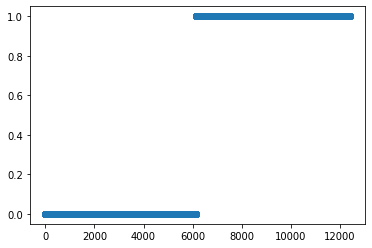

In [79]:
plt.plot(y,'o')

In [80]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
)

- $\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,30)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,30)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [81]:
loss_fn = torch.nn.BCELoss()

In [82]:
optimizr = torch.optim.Adam(net.parameters())

In [83]:
yhat.shape,y.shape

(torch.Size([2000, 1]), torch.Size([12396, 1]))

In [84]:
for epoc in range(200):
    ## 1
    yhat = net(Xnp) 
    ## 2
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

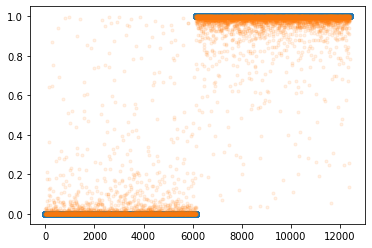

In [85]:
plt.plot(y,'o')
plt.plot(net(Xnp).data,'.',alpha=0.1)

`-` 학습2: torch.nn.BCEWithLogitsLoss() 이용 

In [86]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    #torch.nn.Sigmoid() # <- 이걸 뺍니당..
)

- $\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,30)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,30)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}}=\underset{(n,1)}{net({\bf X})}, \quad \text{sig}(net({\bf X}))\approx {\boldsymbol y}$

In [87]:
torch.manual_seed(43052)
_net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid() 
)

In [88]:
loss_fn = torch.nn.BCEWithLogitsLoss()
_loss_fn = torch.nn.BCELoss()

In [89]:
loss_fn(net(Xnp),y),_loss_fn(_net(Xnp),y) 

(tensor(0.7148, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.7148, grad_fn=<BinaryCrossEntropyBackward0>))

In [90]:
optimizr = torch.optim.Adam(net.parameters())

In [91]:
for epoc in range(200):
    ## 1
    yhat = net(Xnp) 
    ## 2
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

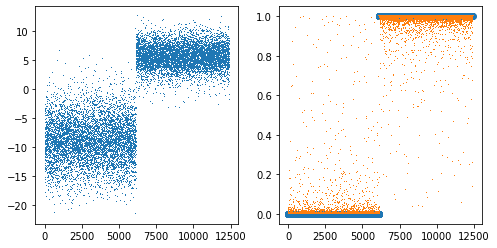

In [92]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(net(Xnp).data,',')
ax[1].plot(y,'o')
ax[1].plot(sig(net(Xnp)).data,',')

note: sigmoid 이후에 0.5 보다 큰지 작은지 판단하는 것 $\Leftrightarrow$ sigmoid 이전에 0 보다 큰지 작은지 판단하는 것

`-` 학습3: torch.nn.CrossEntropyLoss() 이용 

(예비학습1) softmax 

In [434]:
sftmax = torch.nn.Softmax(dim=1)

In [463]:
_x = torch.tensor([[0,0,1,2]]).float()

In [464]:
sftmax(_x)

tensor([[0.0826, 0.0826, 0.2245, 0.6103]])

In [465]:
torch.exp(_x)/torch.exp(_x).sum()

tensor([[0.0826, 0.0826, 0.2245, 0.6103]])

특징1: 총합이1이다 -> 확률의 역할을 함 

특징2: 파라메터의 잉여성 

In [438]:
_x1 = torch.tensor([[0,0,1,2]]).float()
_x2 = torch.tensor([[1,1,2,3]]).float()
_x3 = torch.tensor([[11,11,12,13]]).float()

In [439]:
sftmax(_x1),sftmax(_x2),sftmax(_x3)

(tensor([[0.0826, 0.0826, 0.2245, 0.6103]]),
 tensor([[0.0826, 0.0826, 0.2245, 0.6103]]),
 tensor([[0.0826, 0.0826, 0.2245, 0.6103]]))

(예비학습2) 원핫인코딩 

- $\text{label}=\begin{bmatrix}"3" \\ \dots \\ "3" \\ "7" \\ \dots \\ "7" \end{bmatrix},\quad \boldsymbol{y}=\begin{bmatrix}0 \\ \dots \\ 0 \\ 1 \\ \dots \\ 1 \end{bmatrix},\quad \boldsymbol{y}_{onehot}=\begin{bmatrix} 1 & 0 \\ \dots & \dots \\ 1 & 0 \\ 0 & 1 \\ \dots & \dots \\ 0 & 1 \end{bmatrix}$

In [440]:
yonehot = torch.tensor([[1.0,0.0]]*len(three_tensor) + [[0.0,1.0]]*len(seven_tensor))
#y = torch.tensor([0.0]*len(three_tensor) + [1.0]*len(seven_tensor)).reshape(-1,1) 

In [441]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,30),
    torch.nn.ReLU(),
    torch.nn.Linear(30,2)
)

In [442]:
loss_fn = torch.nn.CrossEntropyLoss() 

In [443]:
optimizr = torch.optim.Adam(net.parameters())

In [444]:
for epoc in range(200):
    ## 1
    yhat = net(Xnp) 
    ## 2 
    loss = loss_fn(yhat,yonehot) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [459]:
net(Xnp)

tensor([[ 0.9389, -3.0820],
        [ 3.9282, -7.1735],
        [ 2.5159, -4.2622],
        ...,
        [-3.2389,  1.6134],
        [-5.3381,  3.4134],
        [-5.8182,  4.0986]], grad_fn=<AddmmBackward0>)

In [445]:
sftmax(net(Xnp))

tensor([[9.8238e-01, 1.7621e-02],
        [9.9998e-01, 1.5086e-05],
        [9.9886e-01, 1.1372e-03],
        ...,
        [7.7495e-03, 9.9225e-01],
        [1.5819e-04, 9.9984e-01],
        [4.9334e-05, 9.9995e-01]], grad_fn=<SoftmaxBackward0>)

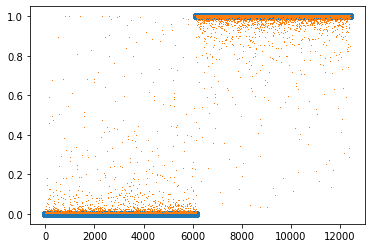

In [447]:
plt.plot(y,'o')
plt.plot(sftmax(net(Xnp)).data[:,1],',')